Para empezar, cargamos las librerias necesarias para poder backtestear la estrategia

In [73]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import quantstats as qt
%matplotlib inline

Descargamos las timeseries de las cotizaciones historicas de los activos, de una fuente gratuita como puede ser Yahoo

In [135]:
spy = yf.download('SPY')
tlt = yf.download('TLT')
ief = yf.download('IEF')
dbc = yf.download('DBC')
gld = yf.download('GLD')
splv = yf.download('SPLV')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Asignamos los pesos a cada uno de los activos, segun el asset allocation que dio Ray Dalio en el libro "Money, Mastering The Game" de Tony Robbins.

In [125]:
peso_spy = 0.3
peso_tlt = 0.4
peso_ief = 0.15
peso_dbc = 0.075
peso_gld = 0.075


Creamos un dataframe, con los que nos interesa, en este caso, el porcentaje de cambio de los cierres ajustados para cada activo.

In [138]:
assets = pd.DataFrame()
assets['gld'] = gld['Adj Close'].pct_change()
assets['dbc'] = tlt['Adj Close'].pct_change()
assets['ief'] = ief['Adj Close'].pct_change()
assets['tlt'] = dbc['Adj Close'].pct_change()
assets['spy'] = spy['Adj Close'].pct_change()
assets['splv'] = splv['Adj Close'].pct_change()
assets = assets.dropna()

Y creamos los retornos de dicha composicion de cartera, multiplicando la ponderacion por el retorno y sumandolo a el resto de ponderaciones.

In [120]:
all_weather = peso_spy * assets['spy'] + \
peso_tlt * assets['tlt'] + \
peso_ief * assets['ief'] + \
peso_dbc * assets['dbc'] + \
peso_gld * assets['gld']

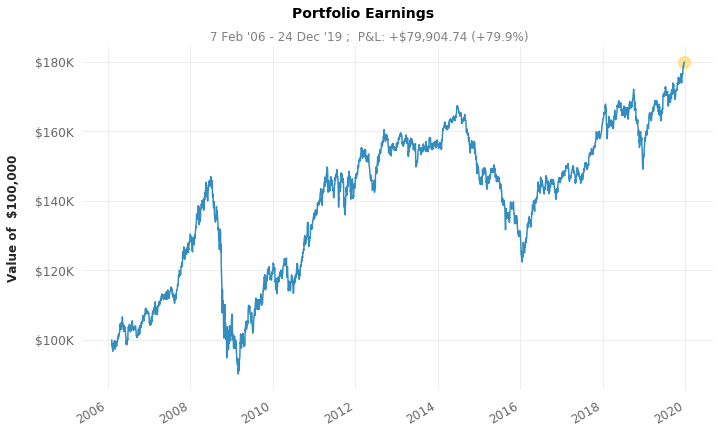

In [127]:
qt.plots.earnings(all_weather)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2006-02-07  2006-02-07
End Period                 2019-12-24  2019-12-24
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          79.9%       236.82%
CAGR%                      4.32%       9.14%
Sharpe                     0.43        0.56
Sortino                    0.61        0.79
Max Drawdown               -38.63%     -55.19%
Longest DD Days            1310        1772
Volatility (ann.)          11.23%      18.83%
R^2                        0.53        0.53
Calmar                     0.11        0.17
Skew                       -0.16       0.15
Kurtosis                   6.45        15.95

Expected Daily %           0.02%       0.03%
Expected Monthly %         0.35%       0.73%
Expected Yearly %          4.28%       9.06%
Kelly Criterion            0.54%       3.69%
Risk of Ruin               0.0%   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-07-03,2009-03-03,2011-04-20,1021,-38.634523,-36.819824
2,2014-06-26,2016-01-20,2018-01-26,1310,-26.883576,-25.159584
3,2018-10-04,2018-12-24,2019-07-10,279,-13.369631,-11.655631
4,2011-05-02,2011-10-03,2012-01-26,269,-9.206435,-8.683408
5,2012-02-27,2012-06-21,2012-08-21,176,-8.206030,-7.830688


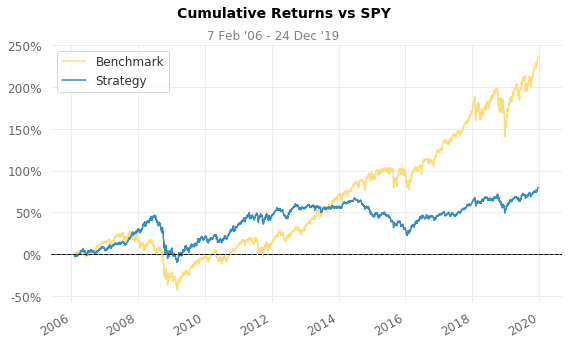

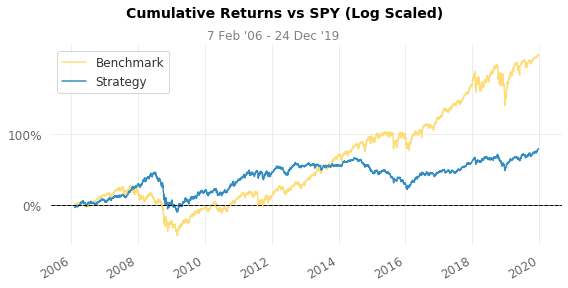

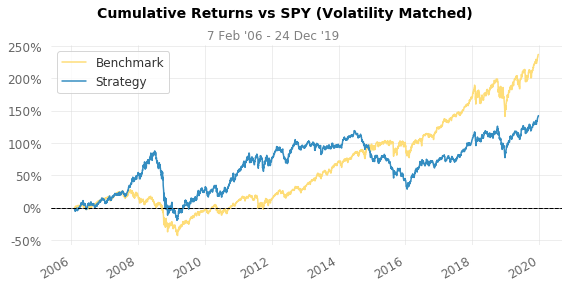

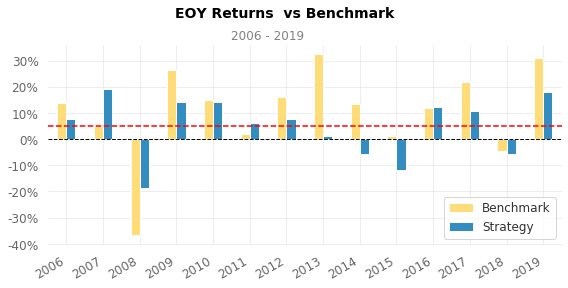

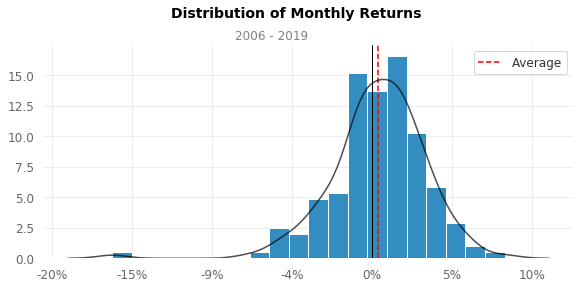

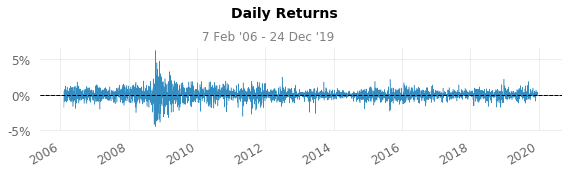

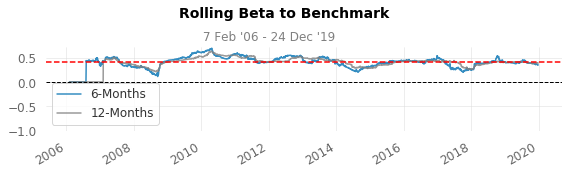

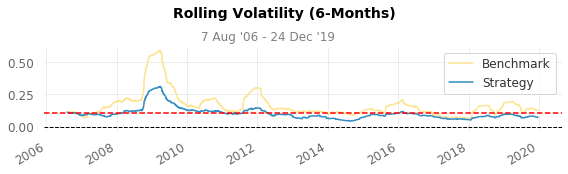

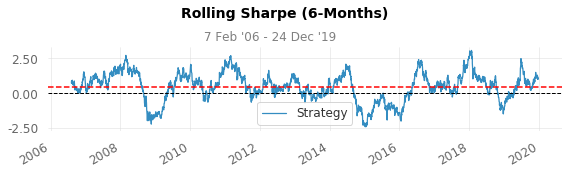

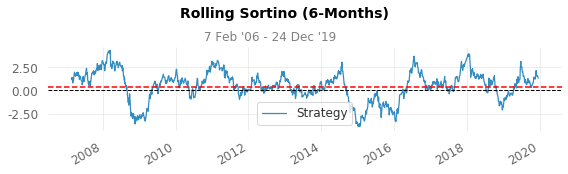

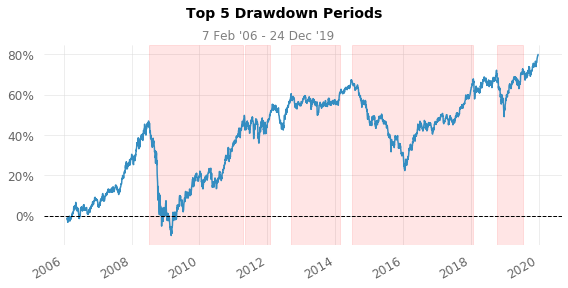

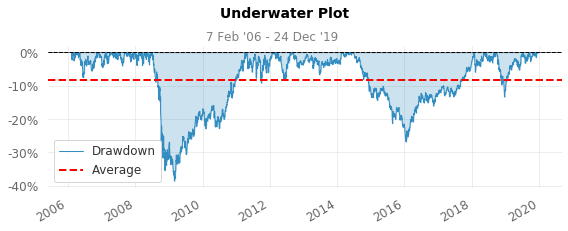

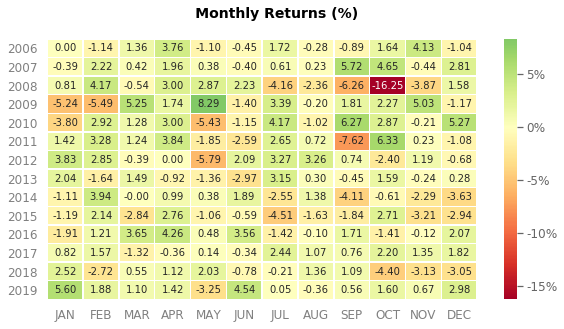

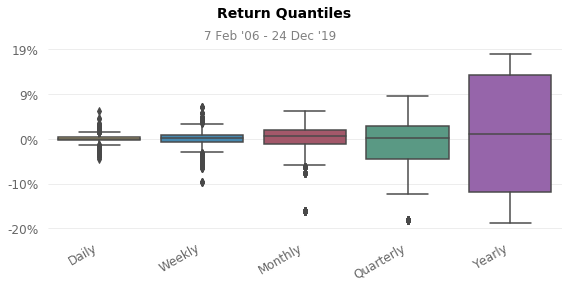

In [134]:
qt.reports.full(all_weather,"SPY")